# Imports

In [44]:
import pandas
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
%matplotlib inline

## Data Reading

In [42]:
# this are the output classes, only two classes are there paitient will dead or alive
classes_list=['dead','alive']


In [2]:
data=pandas.read_csv('./heart_failure_clinical_records_dataset.csv')

In [43]:
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [55]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Suffling the data set
this is to get splitted data, that have all type of the classes in training and testing
when we split the data set then their can be chances of all dead value rows can go in training and no row for the alive cases
hence at the time of model implementation model will only know the dead cases and not alive cases, that result in underfittiing ans will give high error at the time of prediction

In [5]:
shuffled_Data=data.sample(frac=1)

In [6]:
shuffled_Data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
171,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,146,0
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
143,61.0,1,84,0,40,1,229000.0,0.9,141,0,0,110,0
127,58.0,1,200,1,60,0,300000.0,0.8,137,0,0,104,0
21,65.0,1,128,1,30,1,297000.0,1.6,136,0,0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,70.0,0,93,0,35,0,185000.0,1.1,134,1,1,208,0
116,60.0,1,96,1,60,1,271000.0,0.7,136,0,0,94,0
237,70.0,0,232,0,30,0,173000.0,1.2,132,1,0,210,0
263,68.0,1,157,1,60,0,208000.0,1.0,140,0,0,237,0


## Splitting the dataset into training and testing

In [7]:
Training_Data=shuffled_Data[:250]
Testing_Data=shuffled_Data[250:]

## dividing the training data features and labels 
this will be used for training of logistic regression model

In [9]:
training_Labels=Training_Data['DEATH_EVENT']
training_Features=Training_Data.drop(['DEATH_EVENT'],axis=1)

## dividing the testing data features and labels 
this will be used for testing the logistic regression model

In [10]:
testing_Labels=Testing_Data['DEATH_EVENT']
testing_Features=Testing_Data.drop(['DEATH_EVENT'],axis=1)

# Creating the logistic regression model instance

In [15]:
model=LogisticRegression(max_iter=1000)

### fitting the model

In [16]:
model.fit(training_Features,training_Labels)

LogisticRegression(max_iter=1000)

#### Now model is Trained 

## Now Testing the model

In [19]:
predicted_values=model.predict(testing_Features)

In [20]:
predicted_values

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

### Following will show that what is actual value and what is predicted by model

In [51]:
predicted_values=list(predicted_values)
testing_Labels=list(testing_Labels)
print("Actual Values --> Predicted values")
for i in range(len(predicted_values)):
    print("          ",testing_Labels[i]," --> ",predicted_values[i])

Actual Values --> Predicted values
           0  -->  1
           0  -->  0
           1  -->  1
           0  -->  0
           1  -->  1
           0  -->  0
           0  -->  1
           0  -->  1
           0  -->  0
           0  -->  0
           0  -->  1
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0
           1  -->  1
           1  -->  1
           0  -->  0
           1  -->  1
           1  -->  0
           0  -->  0
           0  -->  0
           0  -->  0
           1  -->  1
           0  -->  0
           0  -->  1
           0  -->  0
           1  -->  1
           1  -->  1
           1  -->  1
           0  -->  0
           0  -->  0
           0  -->  0
           1  -->  1
           1  -->  1
           1  -->  1
           0  -->  0
           0  -->  1
           0  -->  0
           0  -->  0
           0  -->  0
           0  -->  0

In [52]:
model.score(testing_Features,predicted_values)

1.0

## plotting the confusion matrix for model of tested data

In [53]:
classification_data=confusion_matrix(testing_Labels,predicted_values)

In [31]:
classification_data

array([[29,  6],
       [ 2, 12]], dtype=int64)

<AxesSubplot:>

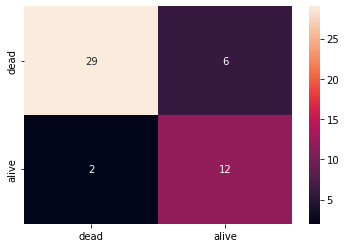

In [41]:
seaborn.heatmap(classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)

## this is the calculation of accuracy of the model and precision of the respective classes

In [39]:
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

              precision    recall  f1-score   support

        dead       0.94      0.83      0.88        35
       alive       0.67      0.86      0.75        14

    accuracy                           0.84        49
   macro avg       0.80      0.84      0.81        49
weighted avg       0.86      0.84      0.84        49

